In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl

data = pd.read_csv('cat_datasets.csv')

In [13]:
corr_data = data.drop(columns=['no', 'name', 'inh_type', 'm_formula', 'corr_specie', 'specie_M', 'steel', 'steel_type' ,
                               'imm_temp', 'imm_time', 'testing', 'method', 'phase', 'HOMO\n(Ha)',
                               'LUMO\n(Ha)', 'ΔEL-H\n(Ha)', 'Dipole Moment\n(a.u.)', 'Total energy\n(Ha)',
                                 'N atom charge', 'Polarizability','Adsorption energy (Parellel, Head-on)', 'Log P',
                                'Van der Waals surface area', 'Van der Waals volume',
                                'Solvent accessible surface area', 'Adsorption', 'Adsorption Isotherm',
                                  'Kads\n(L/mol)', 'ΔGads\n(kJ/mol)', 'C/θ\n(conc./surf. coverage)',
                                 'Concentration (mM)', 'Surface Coverage', 'Corrosion parameters',
                                 'corr_rate', 'inh_mM', 'total_energy',
                               ])
corr_data.columns

Index(['mw', 'homo', 'lumo', 'e_gap', 'ionization_potential', 'e_affinity',
       'electronegatibity', 'hardness', 'dipole', 'no_e_trans',
       'electrophilicity', 'e_donor_cap', 'e_accept_cap', '%ie'],
      dtype='object')

In [14]:
corr_data = corr_data[[ '%ie', 'mw', 'homo', 'lumo', 'e_gap', 'ionization_potential', 'e_affinity',
       'electronegatibity', 'hardness', 'dipole', 'no_e_trans',
       'electrophilicity', 'e_donor_cap', 'e_accept_cap']]
corr_data

,%ie,mw,homo,lumo,e_gap,ionization_potential,e_affinity,electronegatibity,hardness,dipole,no_e_trans,electrophilicity,e_donor_cap,e_accept_cap
0,58.00,543.526,-11.352,-10.456,0.896,11.352,10.456,10.904,0.448,18.490000,-0.291,132.674,138.182,127.278
1,64.50,614.667,-10.842,-10.149,0.693,10.842,10.149,10.495,0.347,30.810000,-0.280,158.852,164.143,153.647
2,67.24,726.880,-10.220,-6.683,3.537,10.220,6.683,8.452,1.769,16.160000,-0.272,20.196,24.643,16.191
3,8.88,641.840,-10.436,-6.206,4.230,10.436,6.206,8.321,2.115,4.245000,-0.282,16.370,20.795,12.474
4,36.50,519.180,-9.507,-4.618,4.889,9.507,4.618,7.062,2.444,8.155000,-0.243,10.202,14.039,6.976
5,40.20,575.287,-9.311,-4.510,4.802,9.311,4.510,6.911,2.401,12.630000,-0.232,9.946,13.702,6.791
6,45.50,603.388,-8.970,-4.483,4.487,8.970,4.483,6.726,2.243,22.820000,-0.213,10.084,13.728,7.001
7,88.82,681.670,-10.575,-9.477,1.098,10.575,9.477,10.026,0.549,17.570000,-0.275,91.572,96.654,86.627
8,66.23,457.489,-7.836,-3.616,4.220,7.836,3.616,5.726,2.110,6.700000,-0.125,7.769,10.896,5.170
9,74.44,485.542,-7.833,-3.611,4.222,7.833,3.611,5.722,2.111,7.166000,-0.125,7.755,10.880,5.158


In [15]:
data_num = len(corr_data.index)
# data_shape = plastic_df.shape
data_shape = corr_data.shape
# cols = plastic_df.columns
cols = corr_data.columns

print(f'There are {data_shape[0]} of datasets and {data_shape[1]} of columns.')
print(cols)
print(corr_data.isnull().any())
print(f'The number of data point is {31*14}.')

There are 31 of datasets and 14 of columns.
Index(['%ie', 'mw', 'homo', 'lumo', 'e_gap', 'ionization_potential',
       'e_affinity', 'electronegatibity', 'hardness', 'dipole', 'no_e_trans',
       'electrophilicity', 'e_donor_cap', 'e_accept_cap'],
      dtype='object')
%ie                     False
mw                      False
homo                    False
lumo                    False
e_gap                   False
ionization_potential    False
e_affinity              False
electronegatibity       False
hardness                False
dipole                  False
no_e_trans              False
electrophilicity        False
e_donor_cap             False
e_accept_cap            False
dtype: bool
The number of data point is 434.


In [16]:
corr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   %ie                   31 non-null     float64
 1   mw                    31 non-null     float64
 2   homo                  31 non-null     float64
 3   lumo                  31 non-null     float64
 4   e_gap                 31 non-null     float64
 5   ionization_potential  31 non-null     float64
 6   e_affinity            31 non-null     float64
 7   electronegatibity     31 non-null     float64
 8   hardness              31 non-null     float64
 9   dipole                31 non-null     float64
 10  no_e_trans            31 non-null     float64
 11  electrophilicity      31 non-null     float64
 12  e_donor_cap           31 non-null     float64
 13  e_accept_cap          31 non-null     float64
dtypes: float64(14)
memory usage: 3.5 KB


In [17]:
corr_data.dtypes

%ie                     float64
mw                      float64
homo                    float64
lumo                    float64
e_gap                   float64
ionization_potential    float64
e_affinity              float64
electronegatibity       float64
hardness                float64
dipole                  float64
no_e_trans              float64
electrophilicity        float64
e_donor_cap             float64
e_accept_cap            float64
dtype: object

In [18]:
corr_data.describe()

,%ie,mw,homo,lumo,e_gap,ionization_potential,e_affinity,electronegatibity,hardness,dipole,no_e_trans,electrophilicity,e_donor_cap,e_accept_cap
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000
mean,60.040323,525.482194,-10.057871,-5.771097,4.286839,10.057871,5.771097,7.914419,2.143387,15.952374,-0.202968,24.61571,28.840968,20.926323
std,22.958723,100.154085,1.657358,2.126528,1.404170,1.657358,2.126528,1.772509,0.701997,11.822202,0.323314,35.80933,36.258107,35.231383
min,8.880000,308.341000,-14.166000,-10.456000,0.693000,6.335000,0.470000,3.402000,0.347000,0.000382,-0.387000,1.97400,4.042000,0.639000
25%,46.095000,457.882500,-10.701500,-6.616500,4.150500,9.140000,4.496500,6.829500,2.075000,6.933000,-0.290500,9.91400,13.715000,6.592500
50%,63.200000,535.527000,-10.016000,-5.966000,4.487000,10.016000,5.966000,7.841000,2.243000,13.570000,-0.270000,14.39600,18.783000,10.786000
75%,75.180000,590.917000,-9.140000,-4.496500,5.264000,10.701500,6.616500,8.568500,2.632000,24.910000,-0.225500,20.25450,25.247000,15.489000
max,96.670000,726.880000,-6.335000,-0.470000,5.933000,14.166000,10.456000,11.208000,2.967000,39.240000,1.507000,158.85200,164.143000,153.647000


In [19]:
corr_mat = corr_data.corr()
corr_mat

,%ie,mw,homo,lumo,e_gap,ionization_potential,e_affinity,electronegatibity,hardness,dipole,no_e_trans,electrophilicity,e_donor_cap,e_accept_cap
%ie,1.000000,0.065265,-0.142246,-0.230787,-0.181594,0.142246,0.230787,0.204945,-0.181616,0.037342,-0.244139,0.135791,0.138680,0.132413
mw,0.065265,1.000000,-0.086032,-0.358801,-0.441814,0.086032,0.358801,0.255471,-0.441995,-0.118782,-0.294392,0.279249,0.280966,0.276301
homo,-0.142246,-0.086032,1.000000,0.751520,-0.042296,-1.000000,-0.751520,-0.918358,-0.042256,0.136769,0.575611,-0.272392,-0.291569,-0.253866
lumo,-0.230787,-0.358801,0.751520,1.000000,0.627333,-0.751520,-1.000000,-0.951245,0.627365,-0.124668,0.565178,-0.752970,-0.765381,-0.739829
e_gap,-0.181594,-0.441814,-0.042296,0.627333,1.000000,0.042296,-0.627333,-0.356553,1.000000,-0.350193,0.176377,-0.818822,-0.814981,-0.820790
ionization_potential,0.142246,0.086032,-1.000000,-0.751520,0.042296,1.000000,0.751520,0.918358,0.042256,-0.136769,-0.575611,0.272392,0.291569,0.253866
e_affinity,0.230787,0.358801,-0.751520,-1.000000,-0.627333,0.751520,1.000000,0.951245,-0.627365,0.124668,-0.565178,0.752970,0.765381,0.739829
electronegatibity,0.204945,0.255471,-0.918358,-0.951245,-0.356553,0.918358,0.951245,1.000000,-0.356591,0.010854,-0.608187,0.579011,0.595423,0.562466
hardness,-0.181616,-0.441995,-0.042256,0.627365,1.000000,0.042256,-0.627365,-0.356591,1.000000,-0.350076,0.176415,-0.818805,-0.814965,-0.820772
dipole,0.037342,-0.118782,0.136769,-0.124668,-0.350193,-0.136769,0.124668,0.010854,-0.350076,1.000000,-0.165657,0.222642,0.219305,0.225148


Text(0.5, 1.0, 'Cationic surfactants')

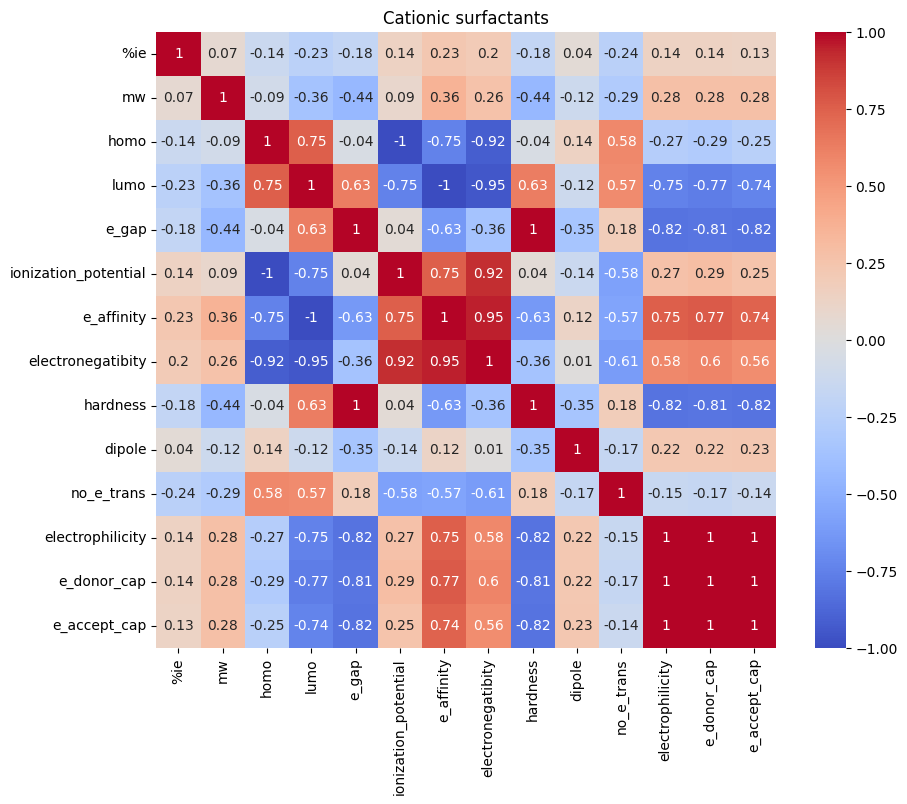

In [20]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(corr_mat.round(2), annot=True, cmap='coolwarm')
plot.set_title("Cationic surfactants")

In [21]:
scipy.stats.pearsonr(x, y) # Pearson's r
scipy.stats.spearmanr(x, y) # Spearman's rho
scipy.stats.kendalltau(x, y) # Kendall's tau


ModuleNotFoundError: No module named 'scipy.stats._boost.nct_ufunc'

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

df = shuffle(corr_data)

x = df.drop('%ie', axis=1)

y = df['%ie']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ModuleNotFoundError: No module named 'scipy.stats._boost.nct_ufunc'

In [93]:
from sklearn import svm
from sklearn import tree


svm = svm.SVR()
df = tree.DecisionTreeRegressor()

svm.fit(x_train, y_train)
df.fit(x_train, y_train)

DecisionTreeRegressor()